In [1]:
# Import libraries
from library.common import Database
import pathlib

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
# import seaborn as sns 
#import altair as alt
import warnings
warnings.filterwarnings("ignore")
#from sklearn.linear_model import LinearRegression
#import statsmodels.api as sm
#from linearmodels import PanelOLS
#from linearmodels import RandomEffects

# Display all columns of pandas dataframes
pd.set_option('display.max_columns', None)

db = Database()
write_to_db = True

# Get the path to raw data files
# path = pathlib.Path.cwd().parent.joinpath(path_to_data)

In [2]:
# read the dataset
data2 = pd.read_sql('master_dataset', db.config)
data2

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,share_global_co2,cumulative_co2,share_global_cumulative_co2,co2_per_gdp,consumption_co2_per_gdp,co2_per_unit_energy,coal_co2,cement_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,cement_co2_per_capita,coal_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,trade_co2_share,share_global_cement_co2,share_global_coal_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2,share_global_other_co2,cumulative_cement_co2,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_oil_co2,cumulative_other_co2,share_global_cumulative_cement_co2,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,total_ghg,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,current_gdp,constant_gdp,manufacturing_gdp,medium_to_high_tech_percent,export,import,real_gdp_growth_percent,urban_population_percent,merchandise_export,merchandise_import,manufacturer_export_share,manufacturer_export,co2_emission_electricity,co2_emission_building,co2_emission_manufacturing,co2_emission_other_fuel,co2_emission_fugitive,co2_emission_transport,co2_emission_energy_subtotal,co2_emission_bunkers,co2_emission_industrial_process,co2_emission_per_capita,constant_gdp_per_capita,manufacturing_percent,medium_to_high_tech_gdp,co2_emission_per_constant_gdp,trade_openness,share_of_merchandise_export,share_of_merchandise_import,industrial_gdp,co2_country_share_percent,manufacturing_country_share_percent,iea_primary_energy_consumption,renewable_energy_consumption,coal_consumption,oil_consumption,total_electricity_production,electricity_production_from_renewable,primary_energy_consumption_per_capita,fossil_energy_consumption_share,renewable_electricity_production_share,energy_intensity,renewable_energy_consumption_share,percent_of_environment_patent,region,income_group
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,0.002,NaN,NaN,0.015,NaN,NaN,NaN,NaN,0.015,NaN,NaN,NaN,NaN,NaN,NaN,0.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
1,AFG,Afghanistan,1950,0.084,NaN,475.0,0.070,NaN,0.011,NaN,NaN,0.099,NaN,0.009,NaN,NaN,0.021,NaN,NaN,NaN,0.063,NaN,NaN,0.003,NaN,NaN,0.008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.036,NaN,NaN,0.063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.421400e+09,NaN,NaN,NaN,7752117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
2,AFG,Afghanistan,1951,0.092,NaN,8.7,0.007,NaN,0.012,NaN,NaN,0.191,NaN,0.010,NaN,NaN,0.026,NaN,NaN,NaN,0.066,NaN,NaN,0.003,NaN,NaN,0.008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.061,NaN,NaN,0.129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.692280e+09,NaN,NaN,NaN,7840151.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
3,AFG,Afghanistan,1952,0.092,NaN,NaN,NaN,NaN,0.012,NaN,NaN,0.282,NaN,0.009,NaN,NaN,0.032,NaN,NaN,NaN,0.060,NaN,NaN,0.004,NaN,NaN,0.008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.093,NaN,NaN,0.189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.001732e+10,NaN,NaN,NaN,7935996.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No

In [3]:
# features used for clustering
base = ['co2', 'consumption_co2', 'trade_co2',
        'co2_per_unit_energy', 'coal_co2', 'cement_co2',
        'flaring_co2', 'gas_co2', 'oil_co2', 'other_industry_co2', 'total_ghg', 'methane',
        'nitrous_oxide', 'population', 'gdp', 'primary_energy_consumption',
        'current_gdp', 'constant_gdp', 'manufacturing_gdp',
        'medium_to_high_tech_percent', 'export', 'import',
        'urban_population_percent', 'merchandise_export', 'merchandise_import',
        'manufacturer_export', 'co2_emission_electricity',
        'co2_emission_building', 'co2_emission_manufacturing', 'co2_emission_other_fuel',
        'co2_emission_fugitive', 'co2_emission_transport',
        'co2_emission_bunkers', 'co2_emission_industrial_process',
        'medium_to_high_tech_gdp',  'industrial_gdp',  'iea_primary_energy_consumption',
        'renewable_energy_consumption', 'coal_consumption', 'oil_consumption',
        'total_electricity_production', 'electricity_production_from_renewable',
        'energy_intensity', 'percent_of_environment_patent'
        ] 
col_use=['co2', 'consumption_co2', 'trade_co2',
        'co2_per_unit_energy', 'coal_co2', 'cement_co2',
        'flaring_co2', 'gas_co2', 'oil_co2', 'other_industry_co2', 'total_ghg', 'methane',
        'nitrous_oxide', 'population', 'gdp', 'primary_energy_consumption',
        'current_gdp', 'constant_gdp', 'manufacturing_gdp',
        'medium_to_high_tech_percent', 'export', 'import',
        'urban_population_percent', 'merchandise_export', 'merchandise_import',
        'manufacturer_export', 'co2_emission_electricity',
        'co2_emission_building', 'co2_emission_manufacturing', 'co2_emission_other_fuel',
        'co2_emission_fugitive', 'co2_emission_transport',
        'co2_emission_bunkers', 'co2_emission_industrial_process',
        'medium_to_high_tech_gdp',  'industrial_gdp',  'iea_primary_energy_consumption',
        'renewable_energy_consumption', 'coal_consumption', 'oil_consumption',
        'total_electricity_production', 'electricity_production_from_renewable',
        'energy_intensity', 'percent_of_environment_patent',
        'iso_code','year'
        ] 
data2=data2[col_use]

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
data2b=data2[data2['iso_code']!='WLD']
data2b=data2b[(data2b['year']>=1990)&(data2b['year']<=2018)]
data2b[base] = MinMaxScaler().fit_transform(data2b[base])

In [5]:
# Computer cosine similarity between China and US in 2018
china_us_2018_df=data2b[(data2b['year']==2018)&((data2b['iso_code']=='CHN')|(data2b['iso_code']=='USA'))]
# drop columns with nan in at least one country
china_us_2018_df=china_us_2018_df.dropna(axis='columns')
# Covert into two arrays
china_2018_df=china_us_2018_df[china_us_2018_df['iso_code']=='CHN']
china_2018_df.drop(['iso_code','year'],axis=1,inplace=True)
china_2018=np.array(china_2018_df)
usa_2018_df=china_us_2018_df[china_us_2018_df['iso_code']=='USA']
usa_2018_df.drop(['iso_code','year'],axis=1,inplace=True)
usa_2018=np.array(usa_2018_df)

In [6]:
# Compute cosine similarity
def cosine_similarity(x,y):
    numerator=np.dot(x,y)
    denominator=np.linalg.norm(x)*np.linalg.norm(y)
    cosine_similarity=numerator/denominator
    return cosine_similarity

In [7]:
# The value is 0.80
cosine_similarity(china_2018[0],usa_2018[0])

0.8002606171482339

In [8]:
# Compute cosine similarity between China and US in 2000
china_us_2000_df=data2b[(data2b['year']==2000)&((data2b['iso_code']=='CHN')|(data2b['iso_code']=='USA'))]
# drop columns with nan in at least one country
china_us_2000_df=china_us_2000_df.dropna(axis='columns')
# Covert into two arrays
china_2000_df=china_us_2000_df[china_us_2000_df['iso_code']=='CHN']
china_2000_df.drop(['iso_code','year'],axis=1,inplace=True)
china_2000=np.array(china_2000_df)
usa_2000_df=china_us_2000_df[china_us_2000_df['iso_code']=='USA']
usa_2000_df.drop(['iso_code','year'],axis=1,inplace=True)
usa_2000=np.array(usa_2000_df)

In [9]:
# The value is only 0.71
cosine_similarity(china_2000[0],usa_2000[0])

0.7057466809020688

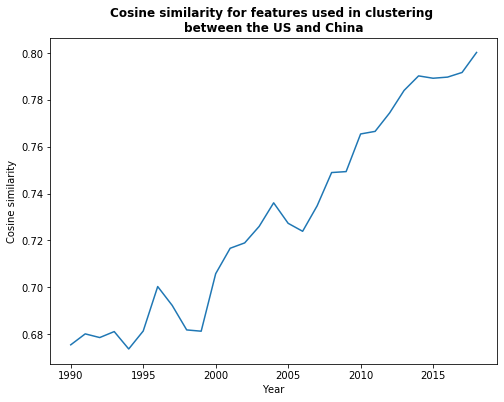

In [10]:
### Plot cosine similarity between USA and China from 1990 to 2018
year_list=[]
cosine_similarity_list=[]
for i in range (1990, 2019):
    china_us_df=data2b[(data2b['year']==i)&((data2b['iso_code']=='CHN')|(data2b['iso_code']=='USA'))]
    china_us_df=china_us_df.dropna(axis='columns')
    china_df=china_us_df[china_us_df['iso_code']=='CHN']
    china_df.drop(['iso_code','year'],axis=1,inplace=True)
    china=np.array(china_df)
    usa_df=china_us_df[china_us_df['iso_code']=='USA']
    usa_df.drop(['iso_code','year'],axis=1,inplace=True)
    usa=np.array(usa_df)
    cosine_similarity_result=cosine_similarity(china[0],usa[0])
    year_list.append(i)
    cosine_similarity_list.append(cosine_similarity_result)
 
plt.figure(figsize=(8, 6))
plt.title('Cosine similarity for features used in clustering \nbetween the US and China',fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Cosine similarity')
plt.plot(year_list,cosine_similarity_list)

In [11]:
# How about India and China?
# Less similar in terms of features considered than China vs USA
china_india_2018_df=data2b[(data2b['year']==2018)&((data2b['iso_code']=='CHN')|(data2b['iso_code']=='IND'))]
# drop columns with nan in at least one country
china_india_2018_df=china_india_2018_df.dropna(axis='columns')
# Covert into two arrays
china_2018_df=china_india_2018_df[china_india_2018_df['iso_code']=='CHN']
china_2018_df.drop(['iso_code','year'],axis=1,inplace=True)
china_2018=np.array(china_2018_df)
india_2018_df=china_india_2018_df[china_india_2018_df['iso_code']=='IND']
india_2018_df.drop(['iso_code','year'],axis=1,inplace=True)
india_2018=np.array(india_2018_df)
cosine_similarity(china_2018[0],india_2018[0])

0.7792243694143406

In [12]:
# Compare cosine similarity between China and the other countries in 2018
# Difference between China and USA has the highest cosine similarity!
cosine_similarity_list2=[]
country_list2=[]
country_list=data2b['iso_code'].unique().tolist()
for country in country_list:
    if (country != 'CHN')&(country != 'WLD'):
        china_x_2018_df=data2b[(data2b['year']==2018)&((data2b['iso_code']=='CHN')|(data2b['iso_code']==country))]
        china_x_2018_df=china_x_2018_df.dropna(axis='columns')
        china_2018_df=china_x_2018_df[china_x_2018_df['iso_code']=='CHN']
        china_2018_df.drop(['iso_code','year'],axis=1,inplace=True)
        china_2018=np.array(china_2018_df)
        x_2018_df=china_x_2018_df[china_x_2018_df['iso_code']==country]
        x_2018_df.drop(['iso_code','year'],axis=1,inplace=True)
        x_2018=np.array(x_2018_df)
        if (len(china_2018[0])>=5):
            result=cosine_similarity(china_2018[0],x_2018[0])
            country_list2.append(country)
            cosine_similarity_list2.append(result)
a=np.argmax(cosine_similarity_list2)  
print(country_list2[a],cosine_similarity_list2[a])

USA 0.8002606171482339
